In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

###IMPORT DATASET###

In [24]:
df = pd.read_csv (r"C:\Users\tverr\Documents\python_dataset.zip")

###VIEW TOP 5 ROWS OF DATA###

In [7]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


###CLEANING THE DATA (CHECKING FOR NAN)###

In [30]:
pd.isna(pd)

False

###CLEANING THE DATA (DROP UNNECESSARY COLUMNS)###

In [25]:
to_drop = ['step', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest']
df.drop(to_drop, inplace=True, axis = 1)

In [11]:
df.head()

,type,amount,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,0,0
1,PAYMENT,1864.28,0,0
2,TRANSFER,181.00,1,0
3,CASH_OUT,181.00,1,0
4,PAYMENT,11668.14,0,0


###CREATING A UNIQUE 'ID' COLUMN TO USE FOR INDEXING###

In [26]:
df['id'] = np.arange(len(df))

In [27]:
df.set_index('id', inplace = True)

In [18]:
df.head()

,type,amount,isFraud,isFlaggedFraud
id,,,,
0,PAYMENT,9839.64,0,0
1,PAYMENT,1864.28,0,0
2,TRANSFER,181.00,1,0
3,CASH_OUT,181.00,1,0
4,PAYMENT,11668.14,0,0


###CHECKING DATA TYPES TO ENSURE THE CODES I WILL RUN WILL WORK###

In [21]:
df.dtypes

type               object
amount            float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

### WHAT IS THE MOST HIGH RISK TRANSACTION TYPE? ###

In [25]:
df.loc[df['isFraud'] == 1].groupby(['type']).count()['isFraud']

type
CASH_OUT    4116
TRANSFER    4097
Name: isFraud, dtype: int64

###ADDING ANOTHER COLUMN TO GIVE INSIGHT ON TRANSACTIONS THAT WERE FRAUD BUT NOT FLAGGED###

In [28]:
df['Reported'] = df['isFraud']+df['isFlaggedFraud']

In [29]:
df.head()

,type,amount,isFraud,isFlaggedFraud,Reported
id,,,,,
0,PAYMENT,9839.64,0,0,0
1,PAYMENT,1864.28,0,0,0
2,TRANSFER,181.00,1,0,1
3,CASH_OUT,181.00,1,0,1
4,PAYMENT,11668.14,0,0,0


### WHAT IS THE AVERAGE AMOUNT OF MONEY PER FRAUDULENT TRANSACTION? ###

In [15]:
means = df.groupby('isFraud')['amount'].mean()
print(means)

isFraud
0    1.781970e+05
1    1.467967e+06
Name: amount, dtype: float64


### HOW MANY TRANSACTIONS WERE FRAUD THAT WERE NOT FLAGGED AS FRAUD ###

###0 = NOT FRAUD, 1 = WAS FRAUD BUT NOT FLAGGED, 2 = WAS FRAUD AND WAS FLAGGED###

In [10]:
df['Reported'].value_counts()

0    6354407
1       8197
2         16
Name: Reported, dtype: int64

###VISUALIZATION OF NON-FLAGGED FRAUD TRANSACTIONS###

<AxesSubplot:ylabel='Reported'>

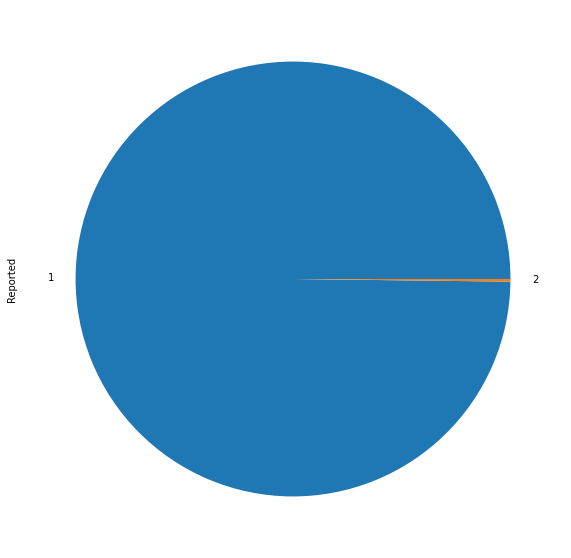

In [51]:
df['Reported'][df['Reported'] > 0].value_counts().plot.pie(figsize = (20,10))